--------------------------------------------------------------
Iteration 0/1 (cell 0)
--------------------------------------------------------------
   k0: 0 , g: [0, 1, 2] , eta: 0.5
   K0: [    3    4    5    6    7;     1    3    5    7    9]
   P0: [  0.5  0.6  0.1  0.2  0.3;     0  0.6  0.4    0    0]
   V0: [    0    1    1    0    1;     0    0    1    1    0]
   W0: [    1    1    0    0    0;     0    1    0    0    0]
   E0: [    0    1    0    0    0;     0    0    0    0    0]
   b0: 0 , v0: [0 0 0]
   s0: [0 0] (||E||=1, theta:2)
   u0: 1 , y0: 0 , x0: 0 (-> 0)
   c: [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
--------------------------------------------------------------
Iteration 0/1 (cell 1)
--------------------------------------------------------------
   k1: 1 , g: [0, 1, 2] , eta: 0.5
   K1: [    4    5    6    7    8;     2    4    5    6    7]
   P1: [  0.1  0.3  0.5  0.6    0;     0  0.5  0.5  0.7    0]
   V1: [    1    1    0    1    1;     0    1    1    0    1]
   W1: [    

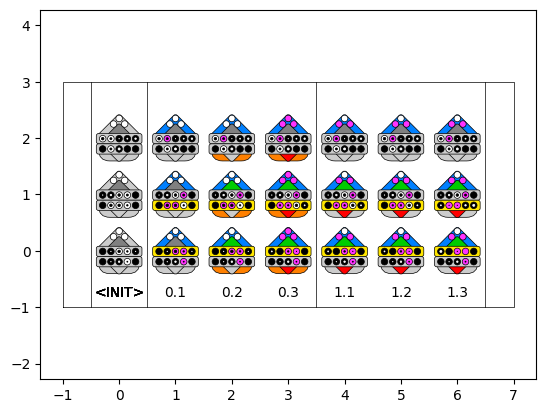

In [2]:
# mini-c: explore a 3 x 1 Cell based minicolumn

from carabao.screen import Monitor
from carabao.cell import Cell,toy
from numpy import ones

def lookup(key):
    dict = {'RAJO':'0.1', 'MYHI':'0.2', 'DUTI':'0.3', 
            'BUMY':'1.1', 'IAKI':'1.2', 'FOBE':'1.3'}
    return dict[key] if key in dict else key

class Mini:
    def __init__(self,mon,k,g,K,P):
        self.mon = mon
        
        self.cells = []
        for i in range(0,3):
            cell = Cell(mon,k[i],g,K[i],P[i])
            self.cells.append(cell)

    def plot(self,j,u=None,c=None):
        for i in range(0,3):
            self.cells[i].plot(i,j,u=u,c=c)   
        self.mon.xlabel(0,'<INIT>',size=9)
        return j+1

    def phase(self,ph,u,c,j,iter):
        """
        c,col = mini.phase(1,u,c,j)
        c,col = mini.phase(2,u,c,j)
        c,col = mini.phase(3,u,c,j)
        """
        n = 0
        for i in range(0,len(self.cells)):
            cell = self.cells[i]
            c = cell.phase(ph,u,c)
            cell.log("Iteration %g/%g (cell %g)" % (iter,ph,i))
            n += cell.mon.hash(cell)

        self.plot(j,u,c)
        cell.mon.xlabel(j,lookup(mon.ascii(n)),size=9)
        halfline = "==============================="
        print("%s%s" % (halfline,halfline))
        return c,j+1

    def iter(self,iteration,u,c,col):
        c,col = self.phase(1,u,c,col,iteration);  
        c,col = self.phase(2,u,c,col,iteration);  
        c,col = self.phase(3,u,c,col,iteration);
        self.mon.separator(col)
        return c,col

#====================================================================================
# run mini3 toy network with 2 iterations
#====================================================================================

k,g,K,P,c = toy('mini3')
mon = Monitor(m=3,n=7)
mini = Mini(mon,k,g,K,P)

u = 1; 
mon.separator(0)
col = mini.plot(0,u=0,c=[])
mon.separator(1)

c,col = mini.iter(0,u,c,col);   # iteration 0
c,col = mini.iter(1,u,c,col);   # iteration 1
